# Optimal arrival rate for M/D/1 queue

In the previous document we analized the optimal arrival rate for M/M/1 queue with fixed update rate $\mu$. In this document we
are going to focus on a bit eaiser problem. Sampling distiribution remains exponential distirbution. But instead of random exponential updating, we are going to have deterministic time. 

In the last document we jumped into the problem with partial result. We gave an averge age $\Delta$ function of a M/M/1 system without argumentation. If we summarize the $\Delta$ function was
$$\Delta = \frac{1}{\mu}\Big(1 + \frac{\mu}{\lambda} + \frac{\lambda^2}{\mu^2-\lambda \mu} \Big). $$

We than took the derivative to find the minimum of this function with respect to $\lambda$. We found that such $\lambda$ is $0.53$. We than simulated the whole process using Python and library Numpy. 

In this document we will skip the mathematical abstraction and directly jump into the simulation. We will use libraries Numpy and Random again. 

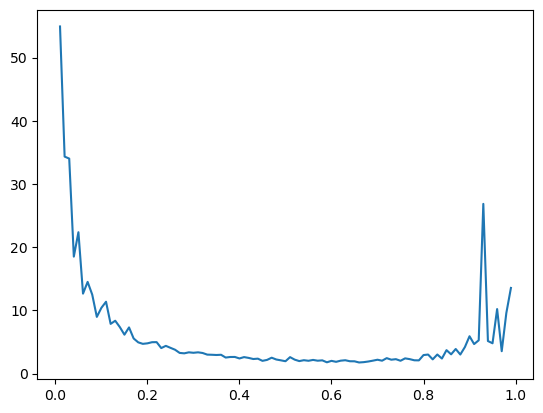

In [3]:
import matplotlib.pyplot as plt
import numpy as np
from numpy import random

def average_age_MD1(scale_of_arrivals):
    #We first create list of arrivals. 
    list_of_arrivals = []
    t = random.exponential(scale=(1/scale_of_arrivals))
    list_of_arrivals.append(t)
    for i in range(20000):
        t = random.exponential(scale=(1/scale_of_arrivals)) + list_of_arrivals[-1]
        list_of_arrivals.append(t)
    #Now, the crutial part. 
    ar_ind = 0 #index of next arrival
    inter_update_time = 0
    time = 0
    queue = []
    age = 0
    age_list = []
    for i in range(100000): #We make 100000 steps of 0.1 time unit. 
        inter_update_time += 0.01
        time += 0.01
        if inter_update_time > 1:
            if len(queue) != 0:
                age = time - queue[0]
                queue = queue[1:]
                inter_update_time = 0
            else:
                age += 0.01
        else:
            age += 0.01
        if time > list_of_arrivals[ar_ind]:
            queue.append(list_of_arrivals[ar_ind])
            ar_ind += 1
        age_list.append(age)

    al = 0
    for e in age_list:
        al += e
    
    average = al/100000
    return average

x_sez = []
x = 0.01
for i in range(99):
    x_sez.append(x)
    x += 0.01

y_sez = []
for e in x_sez:
    y = average_age_MD1(e)
    y_sez.append(y)
    
x_points = np.array(x_sez)
y_points = np.array(y_sez)

plt.plot(x_points, y_points)

plt.show()
    

We want to compare the M/M/1 and M/D/1 queue. We do this in the next lines.

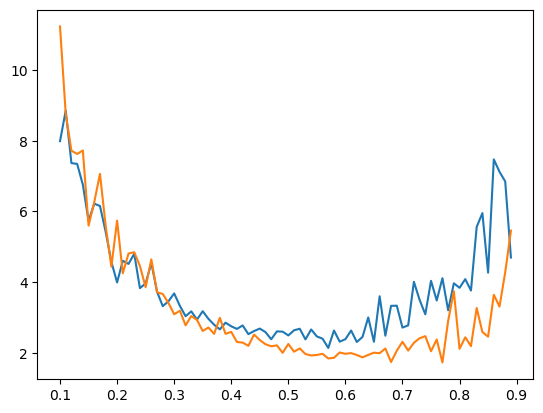

In [11]:
def average_age_MM1(scale_of_arrivals):
    #We first create list of arrivals. 
    list_of_arrivals = []
    t = random.exponential(scale=(1/scale_of_arrivals))
    list_of_arrivals.append(t)
    for i in range(20000):
        t = random.exponential(scale=(1/scale_of_arrivals)) + list_of_arrivals[-1]
        list_of_arrivals.append(t)
    
    #We than create a list of update intervals. 
    list_of_update_intervals = []
    for i in range(20000):
        u = random.exponential(scale=1)
        list_of_update_intervals.append(u)
    
    #Now, the crutial part. 
    ar_ind = 0 #index of next arrival
    up_ind = 0 #index of next update
    inter_update_time = 0
    time = 0
    queue = []
    age = 0
    age_list = []
    for i in range(100000): #We make 100000 steps of 0.1 time unit. 
        inter_update_time += 0.01
        time += 0.01
        if inter_update_time > list_of_update_intervals[up_ind]:
            if len(queue) != 0:
                age = time - queue[0]
                queue = queue[1:]
                inter_update_time = 0
                up_ind += 1
            else:
                age += 0.01
        else:
            age += 0.01
        if time > list_of_arrivals[ar_ind]:
            queue.append(list_of_arrivals[ar_ind])
            ar_ind += 1
        age_list.append(age)

    al = 0
    for e in age_list:
        al += e
    
    average = al/100000
    return average

x_sez = []
x = 0.1
x_sez.append(x)
for i in range(79):
    x += 0.01
    x_sez.append(x)
    
y_sez1 = []
for e in x_sez:
    y_sez1.append(average_age_MM1(e))
y_sez2 = []
for e in x_sez:
    y_sez2.append(average_age_MD1(e))
x_points = np.array(x_sez)
y1_points = np.array(y_sez1)
y2_points = np.array(y_sez2)


plt.plot(x_points, y1_points)
plt.plot(x_points, y2_points)

plt.show()

If we are attentive we can notice that average age of M/D/1 queue is almost everywhere smaller than age of M/M/1 queue. If we would sample even more examples we would notice that graphs are almost the same for small $\lambda$ and that the difference is bigger as we increase the argument. 
In the beggining of the document I said that we will look only to the simulation of the M/D/1 queue. But in the article of Yates, Sun, Brown, Kaul, Modiano and Ulukus: *Age of Information: An Introduction and Survey* one can find analytical results for more than only M/M/1 queue. So, it is also possible to find an analytical formula for M/D/1 queue and it is:
$$ \Delta = \frac{1}{\mu} \Big( \frac{1}{2(1-\rho} + \frac{1}{2} + \frac{(1-\rho) \exp(\rho)}{\rho} \Big) $$

So, as we have formulas for ages of both M/M/1 and M/D/1 queue, we can plot both in the same coordinate system. Let's go ahead and do that. 

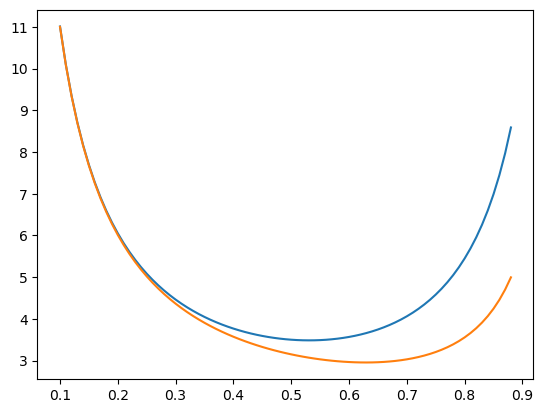

In [10]:
import math

x_sez = []
x = 0.1
for i in range(79):
    x_sez.append(x)
    x += 0.01
    
def age_MM1(x):
    return 1 + 1/x + x**2/(1-x)
    
def age_MD1(x): 
    return 1/(2*(1-x))+1/2+(1-x)*math.exp(x)/x
    
y_sez1 = []
y_sez2 = []
for e in x_sez:
    y_sez1.append(age_MM1(e))
    y_sez2.append(age_MD1(e))

x_points = np.array(x_sez)
y1_points = np.array(y_sez1)
y2_points = np.array(y_sez2)


plt.plot(x_points, y1_points)
plt.plot(x_points, y2_points)

plt.show()